In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

In [2]:
class GeometricDistribution:
    def __init__(self, p):
        self.p = p

    def pmf(self, k):
        return (1 - self.p) ** (k - 1) * self.p

    def cdf(self, x):
        return np.array([self._cdf_single(val) for val in x])

    def _cdf_single(self, k):
        return 1 - (1 - self.p) ** k

def plot_pmf(x_values, pmf1, pmf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.stem(x_values, pmf1, basefmt=" ", linefmt="blue", markerfmt="bo", label=label1)
    plt.stem(x_values, pmf2, basefmt=" ", linefmt="red", markerfmt="ro", label=label2)
    plt.title(title)
    plt.xlabel('Number of Trials (k)')
    plt.ylabel('PMF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_cdf(x_values, cdf1, cdf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.step(x_values, cdf1, where="mid", label=label1, color='blue')
    plt.step(x_values, cdf2, where="mid", label=label2, color='red')
    plt.title(title)
    plt.xlabel('Number of Trials (k)')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_comparison(x_values, pmf_scipy, pmf_custom, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.stem(x_values, pmf_scipy, basefmt=" ", linefmt="blue", markerfmt="bo", label=label1)
    plt.stem(x_values, pmf_custom, basefmt=" ", linefmt="orange", markerfmt="go", label=label2)
    plt.title(title)
    plt.xlabel('Number of Trials (k)')
    plt.ylabel('PMF')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
# Parameters for two geometric distributions
p1 = 0.3
p2 = 0.5

# Generate x values (number of trials until first success)
x_geom_1 = np.arange(1, 20)
x_geom_2 = np.arange(1, 20)

# Calculate PMF and CDF using scipy
pmf_geom_1_scipy = nbinom.pmf(x_geom_1 - 1, 1, p1)
pmf_geom_2_scipy = nbinom.pmf(x_geom_2 - 1, 1, p2)
cdf_geom_1_scipy = nbinom.cdf(x_geom_1 - 1, 1, p1)
cdf_geom_2_scipy = nbinom.cdf(x_geom_2 - 1, 1, p2)

# Create instances of GeometricDistribution
geom_dist_1 = GeometricDistribution(p1)
geom_dist_2 = GeometricDistribution(p2)

# Calculate PMF and CDF using custom class
pmf_geom_1_custom = np.array([geom_dist_1.pmf(k) for k in x_geom_1])
pmf_geom_2_custom = np.array([geom_dist_2.pmf(k) for k in x_geom_2])

cdf_geom_1_custom = geom_dist_1.cdf(x_geom_1)
cdf_geom_2_custom = geom_dist_2.cdf(x_geom_2)

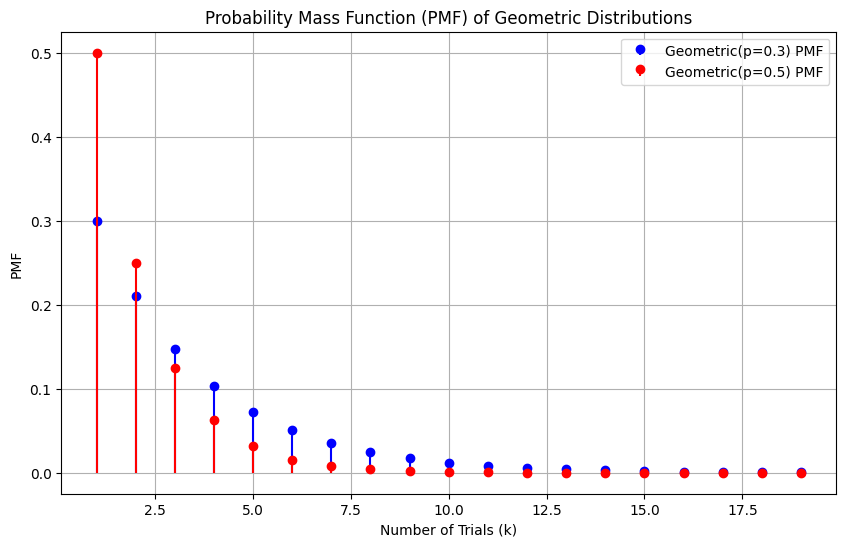

In [4]:
# Plot 1: PMF of Geometric Distributions (Original)
plot_pmf(x_geom_1, pmf_geom_1_scipy, pmf_geom_2_scipy,
         label1=f'Geometric(p={p1}) PMF', 
         label2=f'Geometric(p={p2}) PMF',
         title='Probability Mass Function (PMF) of Geometric Distributions')

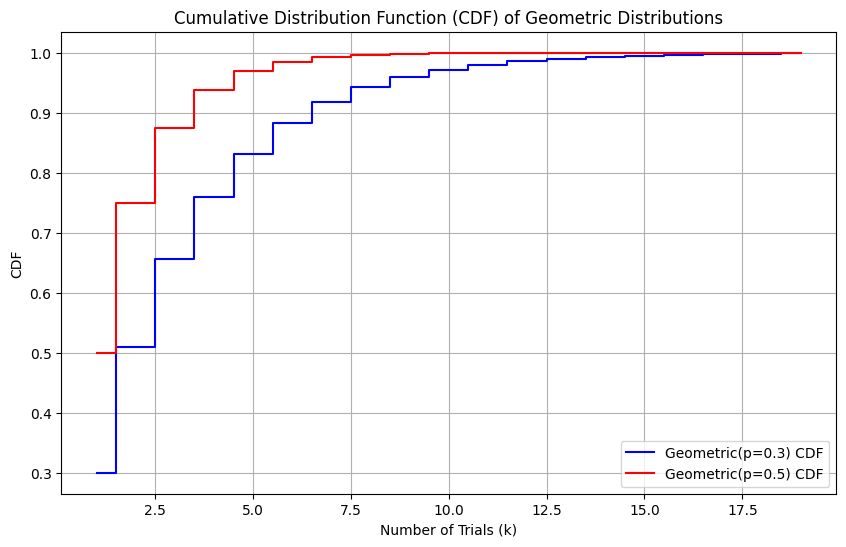

In [5]:
# Plot 2: CDF of Geometric Distributions (Original)
plot_cdf(x_geom_1, cdf_geom_1_scipy, cdf_geom_2_scipy, 
         label1=f'Geometric(p={p1}) CDF', 
         label2=f'Geometric(p={p2}) CDF', 
         title='Cumulative Distribution Function (CDF) of Geometric Distributions')

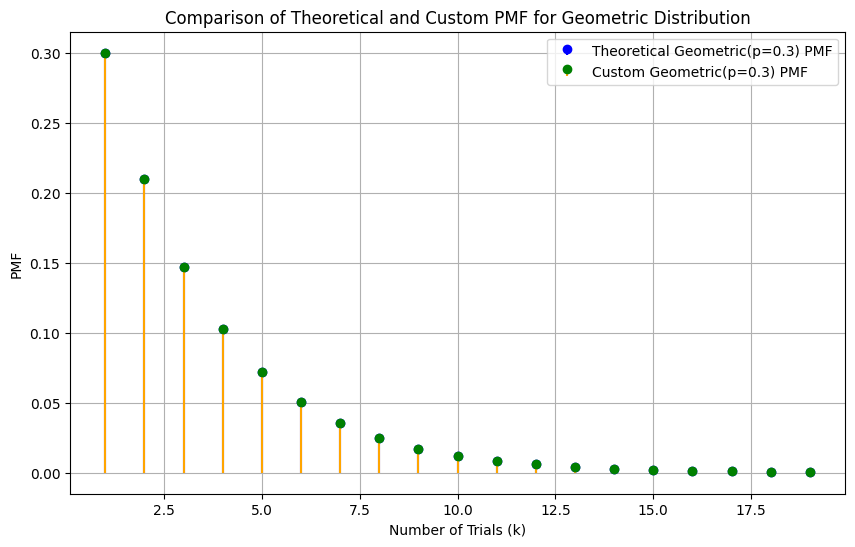

In [6]:
# Plot 3: Comparison of Theoretical and Custom PMFs
plot_comparison(x_geom_1, pmf_geom_1_scipy, pmf_geom_1_custom, 
                label1=f'Theoretical Geometric(p={p1}) PMF', 
                label2=f'Custom Geometric(p={p1}) PMF', 
                title='Comparison of Theoretical and Custom PMF for Geometric Distribution')